<div class="alert alert-success">
<b> Комментарий от ревьюера 3</b>

Спасибо, что учла мои комментарии. Ты приложила много усилий, чтобы довести проект до конца, надеюсь, что эта работа помогла тебе лучше понять теорию. Я принимаю проект и желаю удачи в прохождении курса!

</div>

<div class="alert alert-success">
<b> Комментарий от ревьюера 2</b>

Привет еще раз. Спасибо, что доделала работу. Оформление комментариев по работе сохраняется. Только обозначим, что это вторая итерация. 

</div>

Привет, Даина.

Меня зовут Людмила, и я буду проводить ревью твоего проекта. 

Предлагаю перейти на «ты», если не против)

Но если это не удобно — дай знать, и мы перейдем на «вы». Моя главная задача — не находить сделанные тобою ошибки, а передать свой опыт и помочь тебе стать аналитиком данных.

Мои комментарии будут в ячейках «Комментарий от ревьюера».

---    
<div class="alert alert-block alert-danger">
    
Критическое замечание, которые следует исправить.
</div> 
    
<div class="alert alert-block alert-warning">
    
Замечание\совет на будущее.
</div>
    
<div class="alert alert-block alert-success">
    
Когда всё сделано правильно.
</div>
    
---        
    
Если ты вносишь изменения в проект по моим рекомендациям, указывай, пожалуйста, это в своих комментариях. Будет удобно, если обозначишь свои комментарии заметным цветом или поместишь 

<div class="alert alert-info">
    
в такую ячейку
</div>

Давай при работе с проектом мы будем общаться с тобой в диалоге, поэтому не удаляй и не перемещай мои комментарии, это поможет мне сделать повторную  проверку проекта быстрее.
___

<div class="alert alert-info"> <b>Комментарий студента:</b> Привет! Спасибо за проверку моего проекта

# Проект:Принятие решений в бизнесе

В данном проекте мы проведем анализ данных крупного интернет-магазинна. Наша цель - подготовить список гипотез, запусить A/B тест и проанализировать результаты для увеличения выручки.

<div class="alert alert-warning">
<b>Комментарий от ревьюера</b> 
    
Вступление к проекту станет лучше, если ты добавишь описание данных и план работы.
Тогда получатель исследования сможет быстрее его понять.

</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Поняла. Добавляю ниже

## Описание данных
### Файл hypothesis.csv:
* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

### Файл orders.csv:

* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.

### Файл visitors.csv:
* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

## План работы
### Произвести приоритизацию гипотез, используя фреймворки ICE и RICE и уже присвоенные гипотезам параметры. Установить, какие из гипотез рекомендуется протестировать в первую очередь
### Обработать данные А/В-тестирования:
* Сделать вывод по результатам тестирования
* Дать рекомендацию относительно дальнейших действий в рамках тестирования (продолжить тест или остановить)

### Часть 1. Приоритизация гипотез.

In [1]:
#импортируем нужные нам библиотеки для дальнейшей работы
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import math
import numpy as np

<div class="alert alert-warning">
<b>Комментарий от ревьюера:</b> Ты загружаешь scipy.stats 2 раза под разными названиями. Одного будет достаточно.

</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Исправлено

<div class="alert alert-success">
<b> Комментарий от ревьюера 2</b>

Отлично, теперь здесь у нас нет ничего лишнего. 

</div>

In [2]:
#загрузим данные и посмотрим общую информацию
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [3]:
print(hypothesis.info())
print(orders.info())
print(visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 colum

In [4]:
#преобразуем столбцы в нужный тип данных и приведем название столбцов к нижнему регистру
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

hypothesis.columns = hypothesis.columns.str.lower().str.replace(' ', '_')
orders.columns = orders.columns.str.lower().str.replace(' ', '_')
visitors.columns = visitors.columns.str.lower().str.replace(' ', '_')

#проверим на дубликаты
duplicates_hypothesis = hypothesis.duplicated().sum()
duplicates_orders = orders.duplicated().sum()
duplicates_visitors = visitors.duplicated().sum()

print("Дубликатов в датасете hypothesis:", duplicates_hypothesis)
print("Дубликатов в датасете orders:", duplicates_orders)
print("Дубликатов в датасете visitors:", duplicates_visitors)


Дубликатов в датасете hypothesis: 0
Дубликатов в датасете orders: 0
Дубликатов в датасете visitors: 0


<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера**

Молодец, что делаешь проверку на дубликаты и меняешь формат даты.
</div>

<div class="alert alert-block alert-warning">
    
**Комментарий от ревьюера**

Полезно выполнить проверку, не попадают ли какие-то пользователи в обе группы - по таблице с заказами.

</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Добавляю ниже

In [5]:
#проверим на наличие пользователей, попавших в обе группы
users_in_both_groups = orders.groupby('visitorid').agg({'group': 'nunique'}).reset_index()
users_in_both_groups = users_in_both_groups[users_in_both_groups['group'] > 1]

#вывод первых строк результатов
print(users_in_both_groups.head())


    visitorid  group
2     8300375      2
44  199603092      2
51  232979603      2
55  237748145      2
66  276558944      2


Полученные результаты показывают, что некоторые пользователи попали одновременно в обе группы теста. Это может быть вызвано различными факторами, такими как ошибки при назначении пользователей к группам или изменения групп в процессе тестирования.

<div class="alert alert-success">
<b> Комментарий от ревьюера 2</b>

Молодец, что добавила проверку таких пользователей.

</div>

#### Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [6]:
#теперь когда мы выполнили предобработку данных, переходим к следующему шагу
#вычислим ICE для каждой гипотезы
#hypothesis['ice'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

#отсортируем по их убыванию приоритета
#hypothesis.sort_values(by='ice', ascending=False)

<div class="alert alert-block alert-warning">
    

**Комментарий от ревьюера**

Удобнее вывести названия гипотез целиком: `pd.set_option('max_colwidth', 200)` и округлить значения в колонке ICE до 2 знаков после запятой.
    

</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Исправляю ниже

In [7]:
#теперь, когда мы выполнили предобработку данных, переходим к следующему шагу
# Вычислим ICE для каждой гипотезы.
hypothesis['ice'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

#округлим значения в колонке ICE до 2 знаков после запятой
hypothesis['ice'] = hypothesis['ice'].round(2)

#установим максимальную ширину колонки для вывода названий гипотез целиком
pd.set_option('max_colwidth', 200)

#отсортируем гипотезы по убыванию их приоритета (ICE)
hypothesis.sort_values(by='ice', ascending=False)



,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


<div class="alert alert-success">
<b> Комментарий от ревьюера 2</b>

Супер, теперь можно легко сравнить гипотезы. 

</div>

#### Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [8]:
#вычислим RICE для каждой гипотезы
hypothesis['rice'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

#сортируем их по убыванию приоритета
hypothesis.sort_values(by='rice', ascending=False)


,hypothesis,reach,impact,confidence,efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера**

Молодец, что выводишь таблицу дважды, каждый раз с сортировкой по одному из фреймворков - так различия в их работе максимально наглядны.
</div>

#### Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

Мы можем увидеть что порядок гипотез изменился с 8-0-7-6-2 к 7-2-0-6-8.
Это произошло потому что формулы разные, одна учитывает охват, а другая — нет.

<div class="alert alert-block alert-danger">
    
**Комментарий от ревьюера**

Здесь стоит добавить чуть подробнее, в чем заключается различие формул, что обозначает охват пользователей, и какую гипотезу ты рекомендуешь тестировать первой. Так между частями проекта будет логическая связь.

</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Если рассмотреть результаты, то гипотеза 7 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" оказалась на первом месте по RICE, в то время как по ICE она занимала третье место. Это произошло из-за того, что данная гипотеза имеет самый высокий охват пользователей (reach = 10), что значительно повышает ее приоритет в формуле RICE.

Таким образом, приоритетность гипотез изменилась из-за включения в рассмотрение охвата пользователей, что делает оценку их эффективности более объективной с точки зрения практической применимости и воздействия на аудиторию.

Исходя из результатов RICE, рекомендуется в первую очередь протестировать гипотезу №7, так как она имеет самый высокий показатель RICE и охватывает большую часть пользователей.

<div class="alert alert-success">
<b> Комментарий от ревьюера 2</b>

Да, гипотеза 7 самая перспективная.

</div>

### Часть 2. Анализ A/B-теста 
Проанализируйте A/B-тест:

#### Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

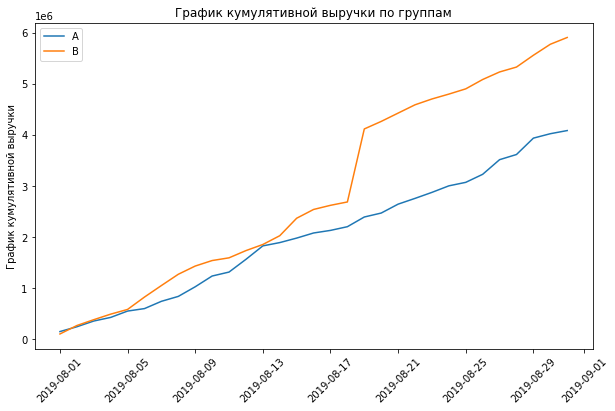

In [9]:
orders_grouped = (orders.groupby(['date','group'], as_index=False)
                        .agg({'transactionid':'nunique','visitorid':'nunique','revenue':'sum'}))\
                        .rename(columns={'transactionid':'orders','visitorid':'buyers'})
orders_grouped['group_copy'] = orders_grouped['group']
orders_grouped = orders_grouped.set_index(['date','group'])
orders_cumsum = orders_grouped.sort_values(['date','group']).groupby('group_copy').cumsum().reset_index()

#посчитаем сумму визитов по дням в каждой группе
visitors_cumsum = visitors.groupby(['date','group'], as_index=False).agg({'visitors':'sum'}).sort_values(['date','group'])
visitors_cumsum['group_copy'] = visitors_cumsum['group']
visitors_cumsum = visitors_cumsum.set_index(['date','group']).groupby('group_copy').cumsum().reset_index()  

cummulative = orders_cumsum.join(visitors_cumsum[['visitors']])
cummulative['average_check'] = cummulative['revenue'] / cummulative['orders']
cummulative['conversion'] = cummulative['orders'] / cummulative['visitors']

cummulativeA = cummulative[cummulative['group']=='A'][['date', 'revenue']]
cummulativeB = cummulative[cummulative['group']=='B'][['date', 'revenue']]
#увеличиваем размер графика
plt.figure(figsize=(10, 6))
plt.plot(cummulativeA.iloc[:,0].to_frame(), cummulativeA.iloc[:,1].to_frame(), label='A' )
plt.plot(cummulativeB.iloc[:,0].to_frame(), cummulativeB.iloc[:,1].to_frame(), label='B')
plt.title('График кумулятивной выручки по группам')
plt.ylabel("График кумулятивной выручки")
plt.xticks(rotation=45)
plt.legend()
plt.show()

<div class="alert alert-block alert-danger">
    

**Комментарий от ревьюера**

Стоит немного увеличить размер этого и следующих графиков, чтобы для дат было достаточно места. 
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Увеличено 👍

<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера 2**

Теперь очень легко понять 👍
</div>

Как мы видим по графику у B есть скачок, похожий на выброс, в то время как A растет равномерно.

<div class="alert alert-block alert-warning">
    
**Комментарий от ревьюера**

В выводы нас просят добавить предположения, с чем может быть связано такое поведение графиков.
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Возможно, причины всплеска выручки в группе "B" может быть запущенная рекламная кампания или акция, которая привлекла больше потенциальных покупателей в группу "B". Это может быть сезонная распродажа, специальное предложение или скидка на определенные товары. Не исключено, что в этот день возникли технические проблемы на сайте или в платежной системе, которые привели к ошибкам в расчетах выручки или к проблемам с оформлением заказов. Это может привести к искажению данных и всплеску выручки. Возможно, какой-то популярный товар или категория товаров стали особенно востребованными в этот день, что привело к увеличению числа заказов и, соответственно, к росту выручки. Или же, внешние факторы. Например, событие в индустрии или обществе, реклама на других платформах или внешние факторы, которые могли привлечь внимание к магазину и стимулировать покупки.

#### Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

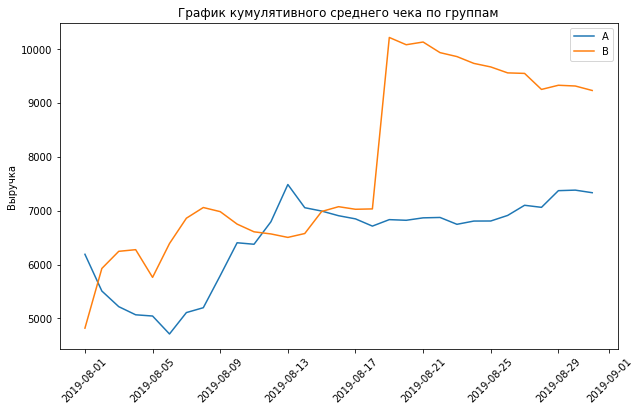

In [10]:
cummulativeA = cummulative[cummulative['group']=='A'][['date', 'average_check']]
cummulativeB = cummulative[cummulative['group']=='B'][['date', 'average_check']]
plt.figure(figsize=(10, 6))
plt.plot(cummulativeA.iloc[:,0].to_frame(), cummulativeA.iloc[:,1].to_frame(), label='A' )
plt.plot(cummulativeB.iloc[:,0].to_frame(), cummulativeB.iloc[:,1].to_frame(), label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.ylabel("Выручка")
plt.xticks(rotation=45)
plt.legend()
plt.show()

Здесь мы видим такой же аномальный скачок для B.

<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера 2**
    
Да, резкий рост происходит в ту же дату, что и на предыдущем графике.
</div>

#### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

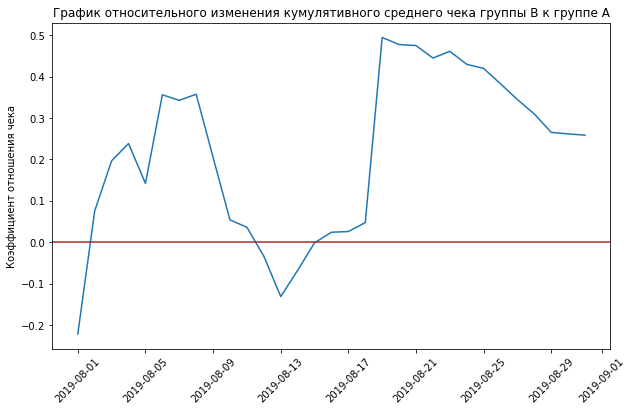

In [11]:
temp = (cummulativeA[['date', 'average_check']].merge(cummulativeB[['date', 'average_check']], 
                                            left_on='date', right_on='date', how='left', suffixes=['_A', '_B']))
plt.figure(figsize=(10, 6))
plt.plot(temp['date'], temp['average_check_B'] / temp['average_check_A']-1)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
#добавляем подпись оси Y
plt.ylabel('Коэффициент отношения чека')
plt.axhline(y=0, color='brown', linestyle='-')
plt.xticks(rotation=45)
plt.show()

<div class="alert alert-block alert-danger">
    
**Комментарий от ревьюера**
    
Добавь, пожалуйста, подпись оси Y. Так график будет проще понять.
    
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Добавлено

Видим то же самое, что и на предыдущих двух графиках.

#### Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.

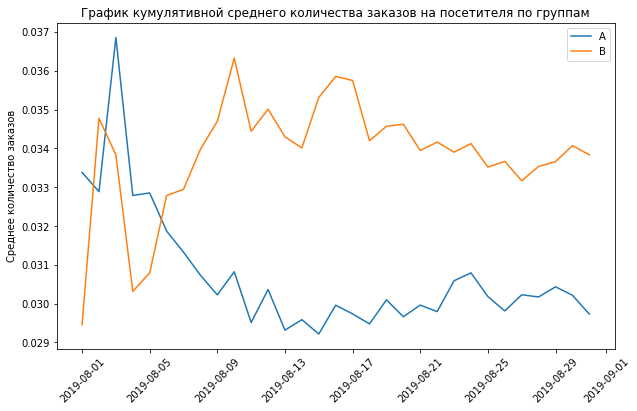

In [12]:
cummulativeA = cummulative[cummulative['group']=='A'][['date', 'conversion']]
cummulativeB = cummulative[cummulative['group']=='B'][['date', 'conversion']]
plt.figure(figsize=(10, 6))
plt.plot(cummulativeA.iloc[:,0].to_frame(), cummulativeA.iloc[:,1].to_frame(), label='A' )
plt.plot(cummulativeB.iloc[:,0].to_frame(), cummulativeB.iloc[:,1].to_frame(), label='B')
plt.title('График кумулятивной среднего количества заказов на посетителя по группам')
plt.ylabel('Среднее количество заказов')
plt.xticks(rotation=45)
plt.legend()
plt.show()

<div class="alert alert-block alert-danger">
    
**Комментарий от ревьюера**
    
Здесь и дальше ты называешь один и тот же показатель иногда "конверсией", а иногда "средним количеством заказов на посетителя". Вторая формулировка более корректная, так как для расчета конверсии в чистом виде, нам нужны id посетителей. Поправь, пожалуйста, формулировки, это можно сделать с помощью автозамены: в меню Edit ➡ Find and Replace. 
    
Кнопка со скриншота ниже позволяет сделать замены сразу во всех ячейках:
    
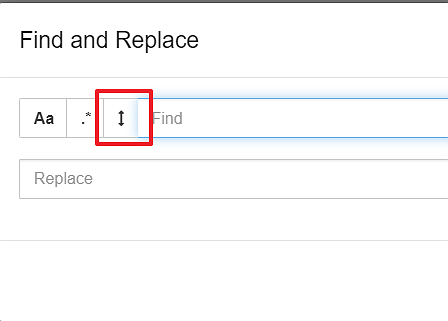
    
Кроме того, на оси Y у нас не выручка, а среднее количество заказов.
    
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Хорошо

У группы B показатель среднего количества заказов на посетителя по группам на данный момент выглядит лучше. У группы А показатель среднего количества заказов на посетителя по группам болтается в районе 0,029 и до 0,031. В-конверсия от 0,033 и до 0,037.

<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера 2**

Всё верно, теперь формулировки совпадают.
</div>

#### Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.

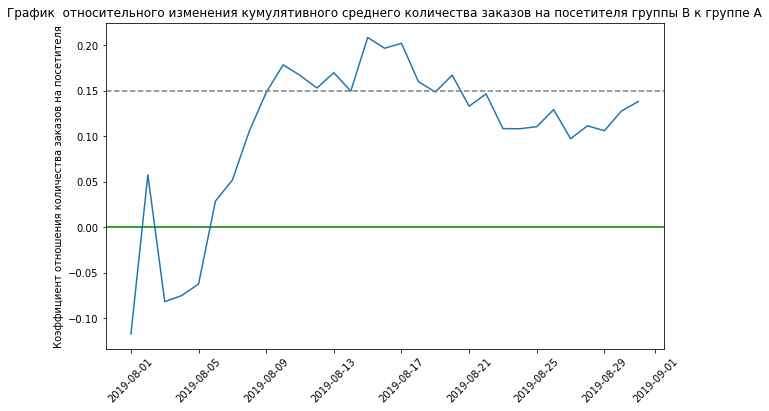

In [13]:
temp = (cummulativeA[['date', 'conversion']].merge(cummulativeB[['date', 'conversion']], 
                                            left_on='date', right_on='date', how='left', suffixes=['_A', '_B']))
plt.figure(figsize=(10, 6))
plt.plot(temp['date'], temp['conversion_B'] / temp['conversion_A']-1)
plt.title('График  относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.ylabel('Коэффициент отношения количества заказов на посетителя')
plt.axhline(y=0, color='green', linestyle='-')
#добавляем линию на уровне 0.15
plt.axhline(y=0.15, color='gray', linestyle='--')
plt.xticks(rotation=45)
plt.show()

<div class="alert alert-block alert-danger">
    
**Комментарий от ревьюера**
    
Здесь также не хватает подписи оси Y.
    
</div>

<div class="alert alert-block alert-warning">
    
**Комментарий от ревьюера**

Для удобства на график можно добавить еще одну линию серым цветом на значение 0.15 по оси y, так как около этого значения намечается тенденция к стабилизации.
    
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> 👍 

B-конверсия намного лучше.

#### Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

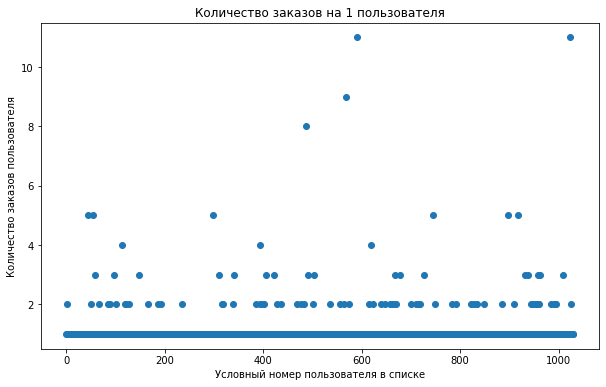

In [14]:
orders_per_user = orders.groupby('visitorid', as_index=False).agg({'transactionid':'nunique'})\
                         .rename(columns={'transactionid':'orders'})
x_values = pd.Series(range(0,len(orders_per_user['orders'])))
plt.figure(figsize=(10, 6))
plt.title('Количество заказов на 1 пользователя')
plt.xlabel('Условный номер пользователя в списке')
plt.ylabel('Количество заказов пользователя')
plt.scatter(x_values, orders_per_user['orders'])
plt.show()

<div class="alert alert-block alert-danger">
    
**Комментарий от ревьюера**
    
Добавь, пожалуйста, для точечных графиков также названия и подписи осей.
    
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> 👍 

<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера 2**

Теперь все графики оформлены очень аккуратно 👍
</div>

Видя по графику, основная часть пользователей предпочитает совершать 1 заказ.

#### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [15]:
print('90 перцентиль: %.2f' % (np.percentile(orders_per_user['orders'], [90])))
print('95 перцентиль: %.2f' % (np.percentile(orders_per_user['orders'], [95])))
print('99 перцентиль: %.2f' % (np.percentile(orders_per_user['orders'], [99])))

90 перцентиль: 1.00
95 перцентиль: 2.00
99 перцентиль: 4.00


95% пользователей совершили 2 заказа или менее за время теста
98% пользователей совершили 3 заказа или более за время теста. Следует отметить, что значение в 3 заказа начинает фигурировать только с этой отметки. Таким образом, 97% процентов пользователей совершили не более 3 заказов за время теста - на этой отметке мы зафиксируем границу.

In [16]:
outlaws= orders_per_user[orders_per_user['orders'] >= 3]['visitorid'].to_list()

<div class="alert alert-block alert-warning">
    
**Комментарий от ревьюера**

Такой выбор границы выбросов получается не совсем удобным. Если сейчас тебя спросят, по какому перцентилю ты провела границу выбросов, ты не сможешь точно ответить. Лучше определять выбросы по тому перцентилю, показатели по которому были рассчитаны. Или рассчитать перцентиль для того количества заказов, которое ты выбираешь как границу выбросов.

</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Рассчитываю перцентиль для того количества заказов, которое буду брать за границу выбросов.

In [17]:
print('96 перцентиль: %.2f' % (np.percentile(orders_per_user['orders'], [96])))
print('97 перцентиль: %.2f' % (np.percentile(orders_per_user['orders'], [97])))
print('98 перцентиль: %.2f' % (np.percentile(orders_per_user['orders'], [98])))

96 перцентиль: 2.00
97 перцентиль: 2.00
98 перцентиль: 3.00


<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера 2**

Здорово, так понятно, на какой перцентиль мы ориентируемся.
</div>

#### Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

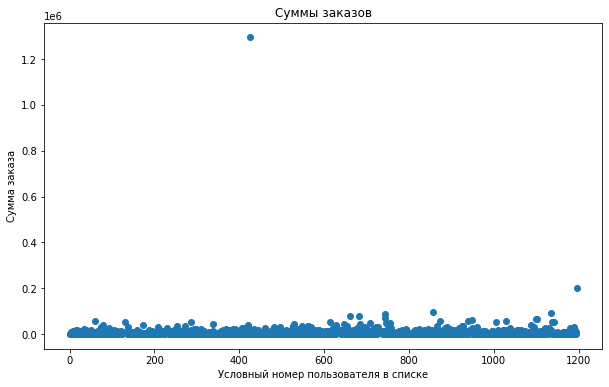

In [18]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(10, 6))
plt.title('Суммы заказов')
plt.xlabel('Условный номер пользователя в списке')
plt.ylabel('Сумма заказа')
plt.scatter(x_values, orders['revenue'])
plt.show()

<div class="alert alert-block alert-warning">
    
**Комментарий от ревьюера**

Полезно добавить еще один график, ограничив значения по оси Y. Чтобы двух явных выбросов не было видно, а мы могли рассмотреть основную часть заказов.

</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Добавляю еще один график

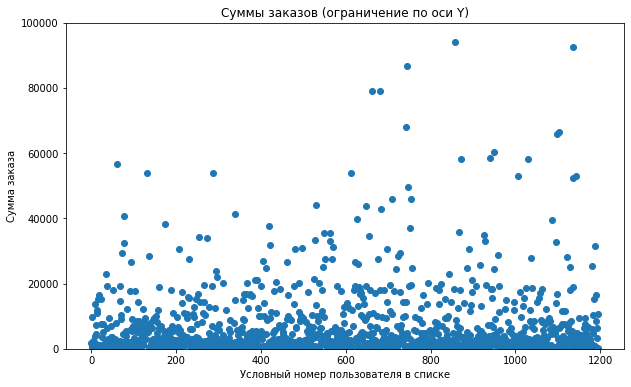

In [19]:
#второй график с ограничением по оси Y
plt.figure(figsize=(10, 6))
plt.title('Суммы заказов (ограничение по оси Y)')
plt.xlabel('Условный номер пользователя в списке')
plt.ylabel('Сумма заказа')
plt.scatter(x_values, orders['revenue'])
plt.ylim(0, 100000)
plt.show()

<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера 2**
    
Удобно, когда можно рассмотреть и выбросы, и основную часть заказов.
</div>

По графику мы видим два аномальных заказа.

#### Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [20]:
print('90 перцентиль: %.2f' % (np.percentile(orders['revenue'], [90])))
print('95 перцентиль: %.2f' % (np.percentile(orders['revenue'], [95])))
print('99 перцентиль: %.2f' % (np.percentile(orders['revenue'], [99])))

90 перцентиль: 18168.00
95 перцентиль: 28000.00
99 перцентиль: 58233.20


In [21]:
print('96 перцентиль: %.2f' % (np.percentile(orders['revenue'], [96])))
print('97 перцентиль: %.2f' % (np.percentile(orders['revenue'], [97])))
print('98 перцентиль: %.2f' % (np.percentile(orders['revenue'], [98])))

96 перцентиль: 31382.00
97 перцентиль: 35485.00
98 перцентиль: 44133.20


Числовые значения суммы заказа при расчете процентилей говорят нам о том, что с 97 процентиля включительно частота дискретизации заказов падает и рост суммы становится относительно большим. В качестве ограничения суммы заказа необходимо использовать 96 процентиль, то есть сумму в 31382 условных единицы.

<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера**
    
Такое определение выбросов для стоимости заказов корректно.
</div>

#### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.

<div class="alert alert-block alert-danger">
    
**Комментарий от ревьюера**
    
Давай оформим этот и следующие 3 вопроса о расчете статистической значимости так, чтобы их было легко понять тому, кого заинтересует твой проект. Вот что должно быть в каждом из 4 пунктов:

* укажи, какое значение alpha ты будешь использовать, чтобы не искать его в коде;
* укажи, почему ты используешь Z-критерий для проверки гипотез;
* также надо поправить формулировки гипотез, чтобы для всех расчетов они были одинаковы, и в них была информация о том, что мы проверяем, есть ли статистически значимые отличия между группами.
  
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Исправляю ниже, в последующих 4 пунктах

* alpha: 0.05
* Используем Z-критерий для разности двух долей, потому что данные о количестве заказов подчиняются биномиальному распределению.
* H0: Среднее количество заказов на посетителя в группе A равно среднему количеству заказов на посетителя в группе B.
* H1: Среднее количество заказов на посетителя в группе A не равно среднему количеству заказов на посетителя в группе B.

<div class="alert alert-block alert-warning">
    
**Комментарий от ревьюера 2**
    
Формулировки гипотез можно дополнить, чтобы в них было указание на то, что нас интересуют именно статистически значимые различия. Например, так:
 
**Нулевая гипотеза** Статистически значимых различий в ... между группами по ... данным нет.

**Альтернативная гипотеза** Статистически значимые различия в ... между группами по ... данным есть.
  
</div>

In [22]:
conversion = (orders.groupby('group').agg({'transactionid':'count'}).rename(columns={'transactionid':'orders'}))\
                                     .join((visitors.groupby('group').agg({'visitors':'sum'}))).reset_index()
conversion['conversion'] = conversion['orders'] / conversion['visitors']
conversion

,group,orders,visitors,conversion
0,A,557,18736,0.029729
1,B,640,18916,0.033834


In [23]:
alpha=0.05
purchases = np.array(conversion['orders'])
leads = np.array(conversion['visitors'])
p1 = purchases[0] / leads[0]
p2 = purchases[1] / leads[1]
combined = (purchases[0] + purchases[1]) / (leads[0] + leads[1])
difference = p1-p2
z_value = difference / math.sqrt(combined * (1 - combined) * (1 / leads[0] + 1 / leads[1]))
distr = st.norm(0,1)
p_value = (1 - distr.cdf(abs(z_value))) * 2
print('p-значение: ', p_value)
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: статистически значимые отличия между группами присутствуют")
else:
    print("Не получилось отвергнуть нулевую гипотезу: статистически значимые отличия между группами отсутствуют")

p-значение:  0.02320723394441848
Отвергаем нулевую гипотезу: статистически значимые отличия между группами присутствуют


<div class="alert alert-block alert-danger">
    
**Комментарий от ревьюера**
    
В уроке вместе со статистической значимостью рассчитывается еще относительное различие между группами. Добавь эти расчеты, пожалуйста, тоже здесь и в следующие пункты: так легче сделать вывод, какая группа лидирует.
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Добавляю

In [24]:
#посчитаем относительное различие в среднем количестве заказов между группами
conversion_A = conversion.loc[conversion['group'] == 'A', 'conversion'].values[0]
conversion_B = conversion.loc[conversion['group'] == 'B', 'conversion'].values[0]
relative_difference = (conversion_B / conversion_A - 1) * 100
print("Относительное различие в среднем количестве заказов между группами: {:.2f}%".format(relative_difference))

Относительное различие в среднем количестве заказов между группами: 13.81%


Таким образом, статистической значимости между конверсиями двух групп по "сырым" данным показывает, что между группами есть статистически значимое отличие.

<div class="alert alert-block alert-danger">
    
**Комментарий от ревьюера 2**

Поправь, пожалуйста, формулировки выше: здесь конверсию надо заменить на среднее количество заказов.
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Исправляю

#### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

* alpha: 0.05
* Используем критерий Манна-Уитни, так как данные о средних чеках могут не подчиняться нормальному распределению.
* H0: Средний чек заказа в группе A равен среднему чеку заказа в группе B.
* H1: Средний чек заказа в группе A не равен среднему чеку заказа в группе B.

In [25]:
alpha = 0.05
results = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])
pvalue = results.pvalue
print('p-значение: ', pvalue)
if (pvalue < alpha):
    print("Отвергаем нулевую гипотезу: статистически значимые отличия между группами присутсвуют")
else:
    print("Не получилось отвергнуть нулевую гипотезу: статистически значимые отличия между группами отсутствуют")

p-значение:  0.7292909855432458
Не получилось отвергнуть нулевую гипотезу: статистически значимые отличия между группами отсутствуют


In [26]:
#рассчитаем относительное различие в среднем чеке между группами
mean_revenue_A = orders[orders['group'] == 'A']['revenue'].mean()
mean_revenue_B = orders[orders['group'] == 'B']['revenue'].mean()
relative_difference_revenue = (mean_revenue_B / mean_revenue_A - 1) * 100
print("Относительное различие в среднем чеке между группами: {:.2f}%".format(relative_difference_revenue))

Относительное различие в среднем чеке между группами: 25.87%


<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера**

Да, по этому показателю между группами нет статистически значимых различий.
</div>

#### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.

* alpha: 0.05
* Используем Z-критерий для разности двух долей, потому что данные о количестве заказов подчиняются биномиальному распределению.
* H0: Среднее количество заказов на посетителя в группе A (по "очищенным" данным) равно среднему количеству заказов на посетителя в группе B (по "очищенным" данным).
* H1: Среднее количество заказов на посетителя в группе A (по "очищенным" данным) не равно среднему количеству заказов на посетителя в группе B (по "очищенным" данным).

In [27]:
orders_temp = orders[~orders['visitorid'].isin(outlaws)]
conversion_clear = (orders_temp.groupby('group').agg({'transactionid':'count'}).rename(columns={'transactionid':'orders'}))\
                                                .join((visitors.groupby('group').agg({'visitors':'sum'}))).reset_index()
alpha=0.05
purchases = np.array(conversion_clear['orders'])
leads = np.array(conversion_clear['visitors'])
p1 = purchases[0] / leads[0]
p2 = purchases[1] / leads[1]
combined = (purchases[0] + purchases[1]) / (leads[0] + leads[1])
difference = p1-p2
z_value = difference / math.sqrt(combined * (1 - combined) * (1 / leads[0] + 1 / leads[1]))
distr = st.norm(0,1)
p_value = (1 - distr.cdf(abs(z_value))) * 2
print('p-значение: ', p_value)
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: статистически значимые отличия между группами присутствуют")
else:
    print("Не получилось отвергнуть нулевую гипотезу: статистически значимые отличия между группами отсутствуют")   

p-значение:  0.009097734802026691
Отвергаем нулевую гипотезу: статистически значимые отличия между группами присутствуют


In [28]:
# Посчитаем количество заказов и посетителей в каждой группе после очистки данных от выбросов
conversion_clear = orders_temp.groupby('group').agg({'transactionid':'count', 'visitorid':'nunique'}).reset_index()
conversion_clear.columns = ['group', 'orders_clear', 'visitors_clear']

conversion_clear['conversion_clear'] = conversion_clear['orders_clear'] / conversion_clear['visitors_clear']

# Посчитаем относительное различие в среднем количестве заказов на посетителя между группами по «очищенным» данным между группами по "очищенным" данным
conversion_clear_A = conversion_clear.loc[conversion_clear['group'] == 'A', 'conversion_clear'].values[0]
conversion_clear_B = conversion_clear.loc[conversion_clear['group'] == 'B', 'conversion_clear'].values[0]
relative_difference_clear = (conversion_clear_B / conversion_clear_A - 1) * 100
print("Относительное различие в среднем количестве заказов на посетителя между группами по «очищенным» данным между группами (по очищенным данным): {:.2f}%".format(relative_difference_clear))


Относительное различие в среднем количестве заказов на посетителя между группами по «очищенным» данным между группами (по очищенным данным): 0.11%


<div class="alert alert-block alert-danger">
    
**Комментарий от ревьюера 2**

Здесь тоже надо поправить формулировку.
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Исправляю

<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера**

Верно, при анализе "очищенных данных" p-value стало еще меньше и все так же меньше 0.05, следовательно, между группами есть статистически значимые различия.
</div>

#### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

* alpha: 0.05
* Используем критерий Манна-Уитни, так как данные о средних чеках могут не подчиняться нормальному распределению.
* H0: Средний чек заказа в группе A (по "очищенным" данным) равен среднему чеку заказа в группе B (по "очищенным" данным).
* H1: Средний чек заказа в группе A (по "очищенным" данным) не равен среднему чеку заказа в группе B (по "очищенным" данным).

In [29]:
orders_clear = orders.query('revenue <= %.2f' % (np.percentile(orders['revenue'], [96])))
alpha = 0.05
results = st.mannwhitneyu(orders_clear[orders_clear['group']=='A']['revenue'], orders_clear[orders_clear['group']=='B']['revenue'])
pvalue = results.pvalue
print('p-значение: ', pvalue)
if (pvalue < alpha):
    print("Отвергаем нулевую гипотезу: статистически значимые отличия между группами присутствуют")
else:
    print("Не получилось отвергнуть нулевую гипотезу: статистически значимые отличия между группами отсутствуют")

p-значение:  0.6530319996011142
Не получилось отвергнуть нулевую гипотезу: статистически значимые отличия между группами отсутствуют


In [30]:
#рассчитаем относительное различие в среднем чеке между группами по "очищенным" данным.
mean_revenue_clear_A = orders_clear[orders_clear['group'] == 'A']['revenue'].mean()
mean_revenue_clear_B = orders_clear[orders_clear['group'] == 'B']['revenue'].mean()
relative_difference_revenue_clear = (mean_revenue_clear_B / mean_revenue_clear_A - 1) * 100
print("Относительное различие в среднем чеке между группами (по очищенным данным): {:.2f}%".format(relative_difference_revenue_clear))

Относительное различие в среднем чеке между группами (по очищенным данным): 2.81%


<div class="alert alert-block alert-danger">
    
**Комментарий от ревьюера**

Лучше избегать ручного ввода значений при фильтрации: можно использовать непосредственно результат расчета выбранного перцентиля. 

</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Исправила выше

<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера 2**

Так не придется менять вписанные вручную числа, если поменяются данные.
</div>

#### Примите решение по результатам теста и объясните его. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

Остановить тест, зафиксировать победу одной из групп. Существует значимое различие в конверсии между группами как по "сырым", так и по данным после фильтрации аномалий, при этом конверсия в группе B выше, чем в группе A. Не обнаружено статистически значимого различия в среднем чеке между группами ни по "сырым", ни по данным после фильтрации аномалий. Однако средний чек в группе B выше, чем в группе A. На основании этой информации рекомендуется остановить тест и зафиксировать победу группы B, так как ее конверсия значительно превышает конверсию группы A.

<div class="alert alert-block alert-danger">
    
**Комментарий от ревьюера 2**

Дополни, пожалуйста, вывод: сейчас непонятно, какая группа победила.
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Вывод почему-то не сохранился, добавила выше

<div class="alert alert-block alert-info">

<b>Итоговый комментарий от ревьюера</b>

Благодарю тебя за выполнение проекта. Вижу ты постаралась, когда работала над ним. Однако, в проекте есть несколько замечаний, которые надо исправить:

* дополнить вывод по приоритизации;
* дополнить оформление графиков;
* скорректировать формулировки;
* дополнить описание статистических расчетов;
* не использовать ручной ввод при фильтрации;
* дополнить вывод.
       
Жду проект после доработки. Уверена, ты справишься. 💪
</div>

<div class="alert alert-block alert-info">

<b>Итоговый комментарий от ревьюера 2</b>

Замечания, которые осталось исправить:

* скорректировать формулировки;
* дополнить вывод.
       
</div>